## CMPINF 2100 Week 07

### Visualizing relationships between continous variables via PAIRS PLOTS

The previous recordings focused mostly on just 2 continuous variables. However, we saw that CORRELATION PLOTS scale to MANY pairs of continuous variables. The PAIRS PLOT is a way to visualize the relationships between MULTIPLE variables in one figure!

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read Data

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Scatter plot

Visualizes the relationship between 2 continuous variables.

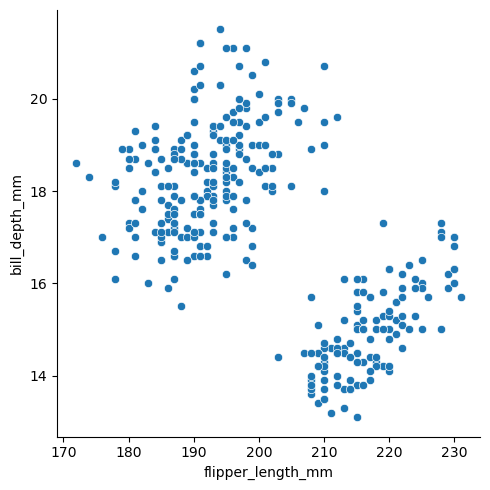

In [4]:
sns.relplot(data = penguins, x='flipper_length_mm', y='bill_depth_mm')

plt.show()

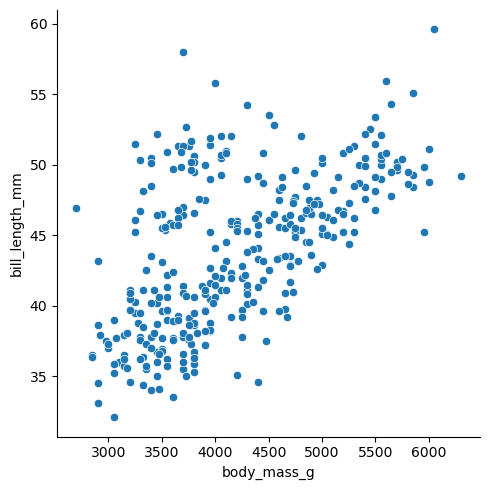

In [5]:
sns.relplot(data = penguins, x='body_mass_g', y='bill_length_mm')

plt.show()

In [6]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


We still have not LOOKED at ALL pairs of continuous variables!!!

This might seem like a very tedious task...to make the scatter plot between ALL pairs!

## Pairs plot

The pairs plot is a SHORT CUT!!!! It will create ALL pairs of scatter plots FOR YOU!!!!!

The function is the `sns.pairplot()` function. It is a figure level function because it generates MANY facets!!!

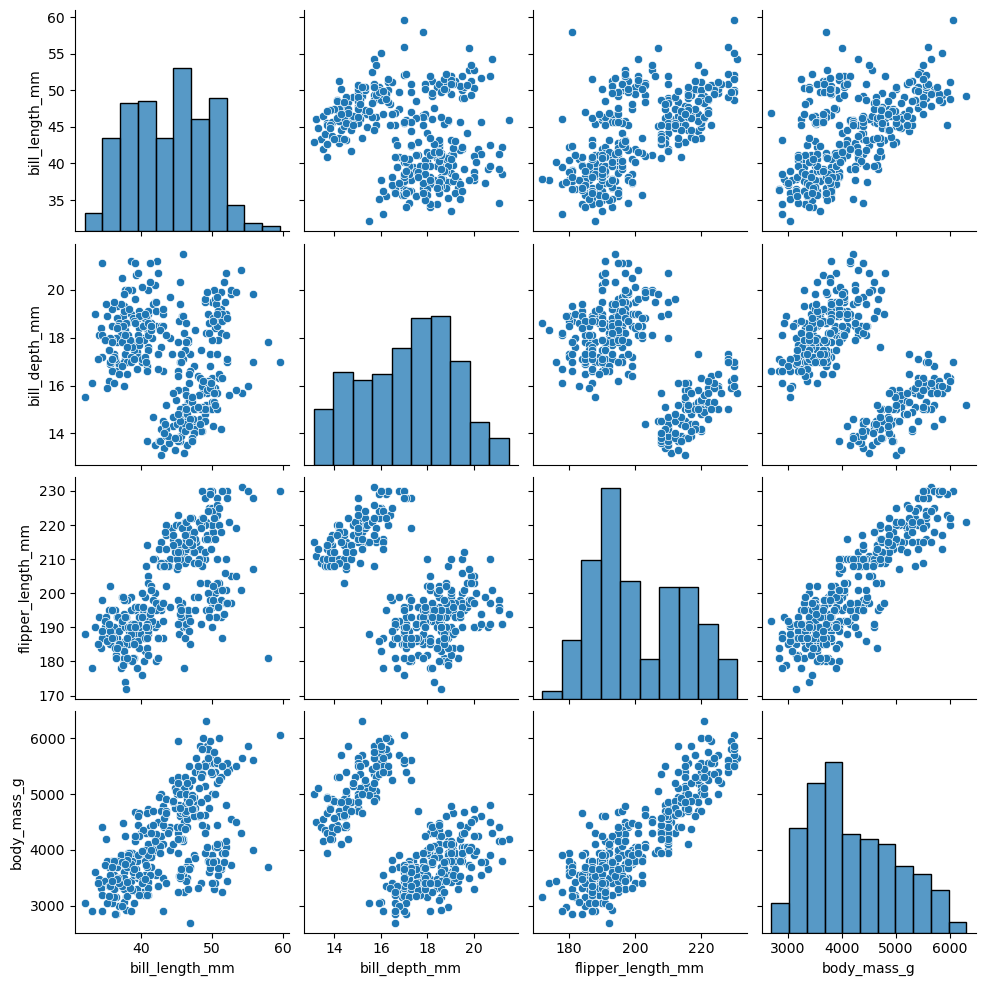

In [7]:
sns.pairplot(data = penguins)

plt.show()

Confirm one of the MARGINAL histograms!

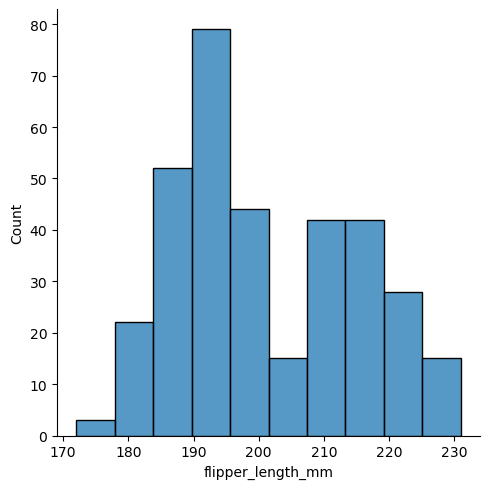

In [10]:
sns.displot(data = penguins, x='flipper_length_mm', kind='hist', bins=10)

plt.show()

We can GROUP or CONDITION ON  categorical variables within PAIRS PLOTS just like we did with SCATTER PLOTS and TREND PLOTS!!!

We can COLOR by a CATEGORICAL variable via the `hue` argument!!!!!

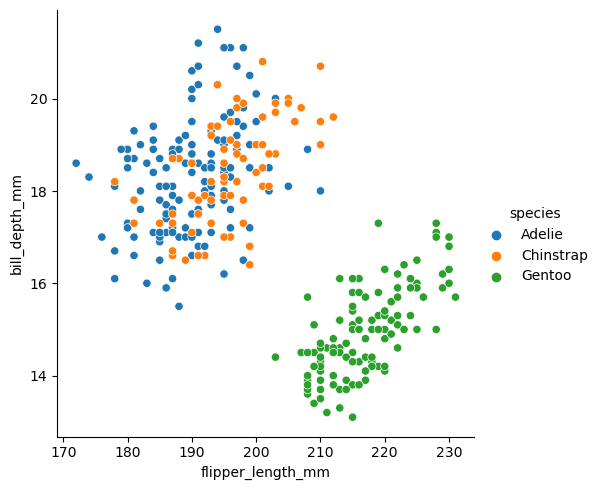

In [11]:
sns.relplot(data = penguins, x='flipper_length_mm', y='bill_depth_mm', hue='species')

plt.show()

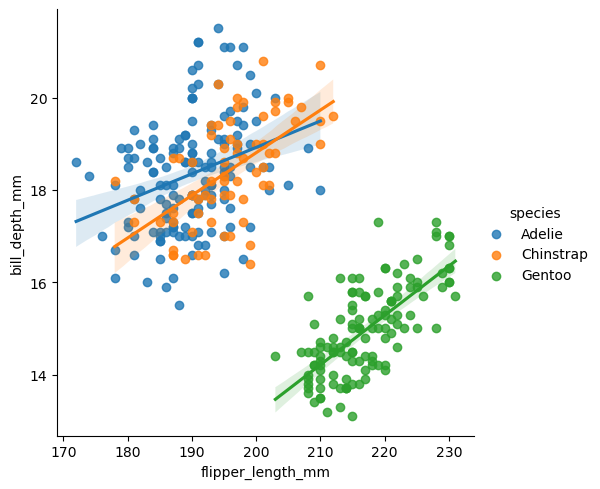

In [12]:
sns.lmplot(data = penguins, x='flipper_length_mm', y='bill_depth_mm', hue='species')

plt.show()

We can color PAIRS PLOTS via `hue`!!!

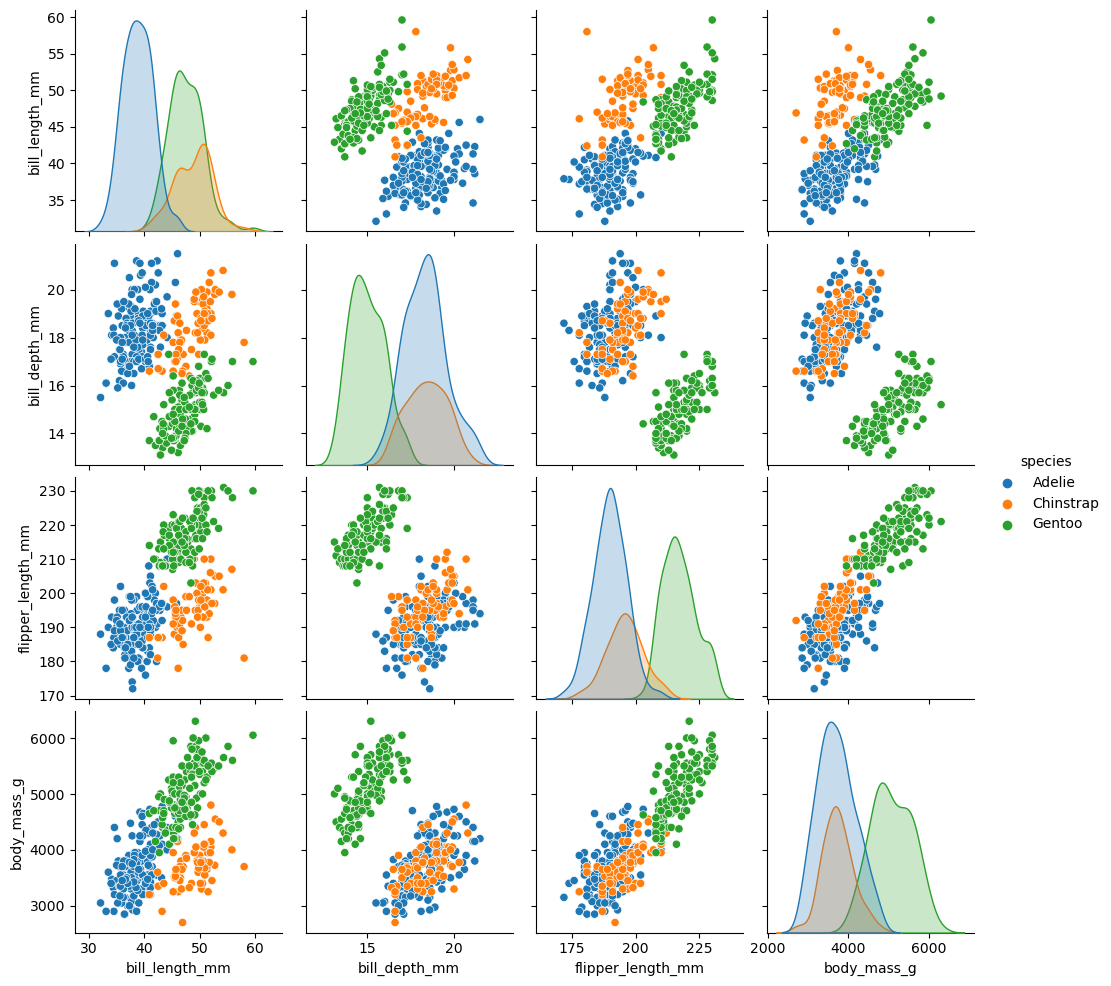

In [13]:
sns.pairplot(data = penguins, hue='species')

plt.show()

HOWEVER...the above PAIRS PLOT is **WRONG**!!!!!!

Look at the COUNTS for the `species`.

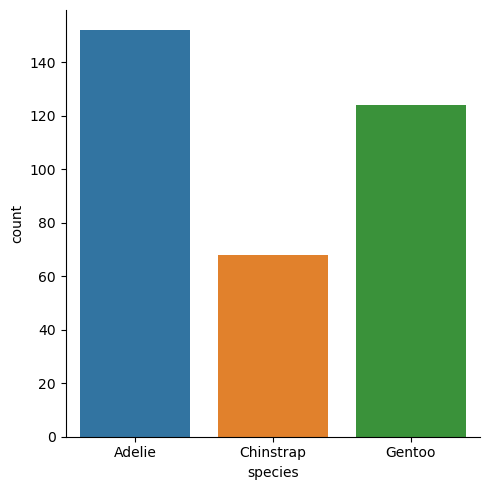

In [14]:
sns.catplot(data = penguins, x='species', kind='count')

plt.show()

The DEFAULT pairs plot in Seaborn is WRONG because the CONDITIONAL KDE shown along the MAIN DIAGONAL is FOOLED by the SAMPLE SIZE!!!

We need to remove the sample size effect by setting `common_norm` to FALSE!!!!!!!!

This is the same problem in the CONDITIONAL KDE chart!

The marginal KDE is shown below for one variable.

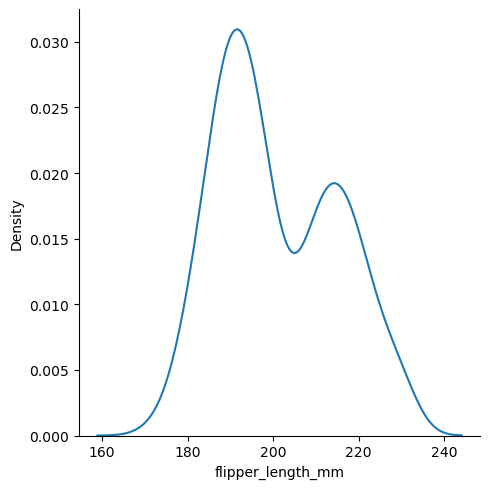

In [15]:
sns.displot(data = penguins, x='flipper_length_mm', kind='kde')

plt.show()

The conditional KDE is shown with the WRONG settings!

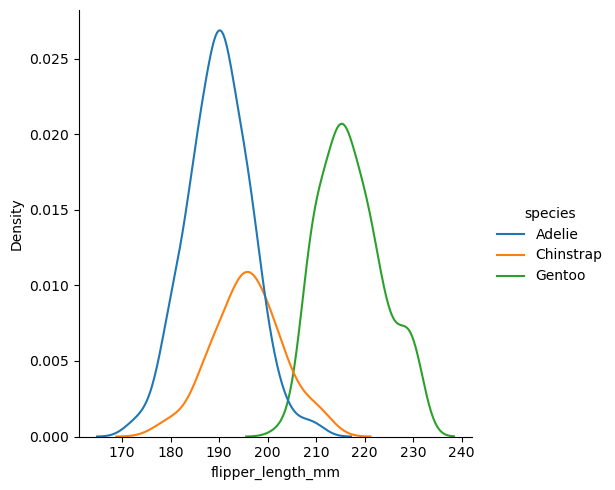

In [16]:
sns.displot(data = penguins, x='flipper_length_mm', kind='kde', hue='species')

plt.show()

REMOVE the sample size EFFECT with `common_norm=False`.

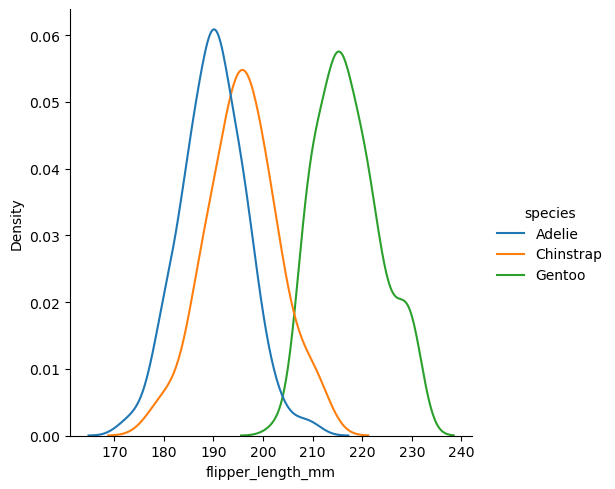

In [17]:
sns.displot(data = penguins, x='flipper_length_mm', kind='kde', hue='species', common_norm=False)

plt.show()

The CONDITIONAL KDE should give you the same conclusion as the VIOLIN PLOT!

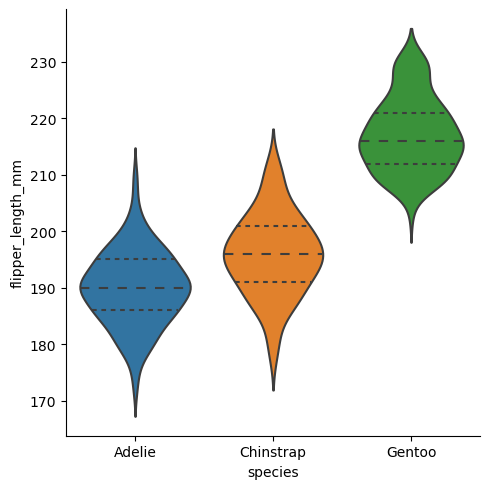

In [18]:
sns.catplot(data = penguins, x='species', y='flipper_length_mm', kind='violin', inner='quartile')

plt.show()

You must remove the SAMPLE SIZE effect with the PAIRS PLOT just as you did with the CONDITIONIAL KDE!!!!

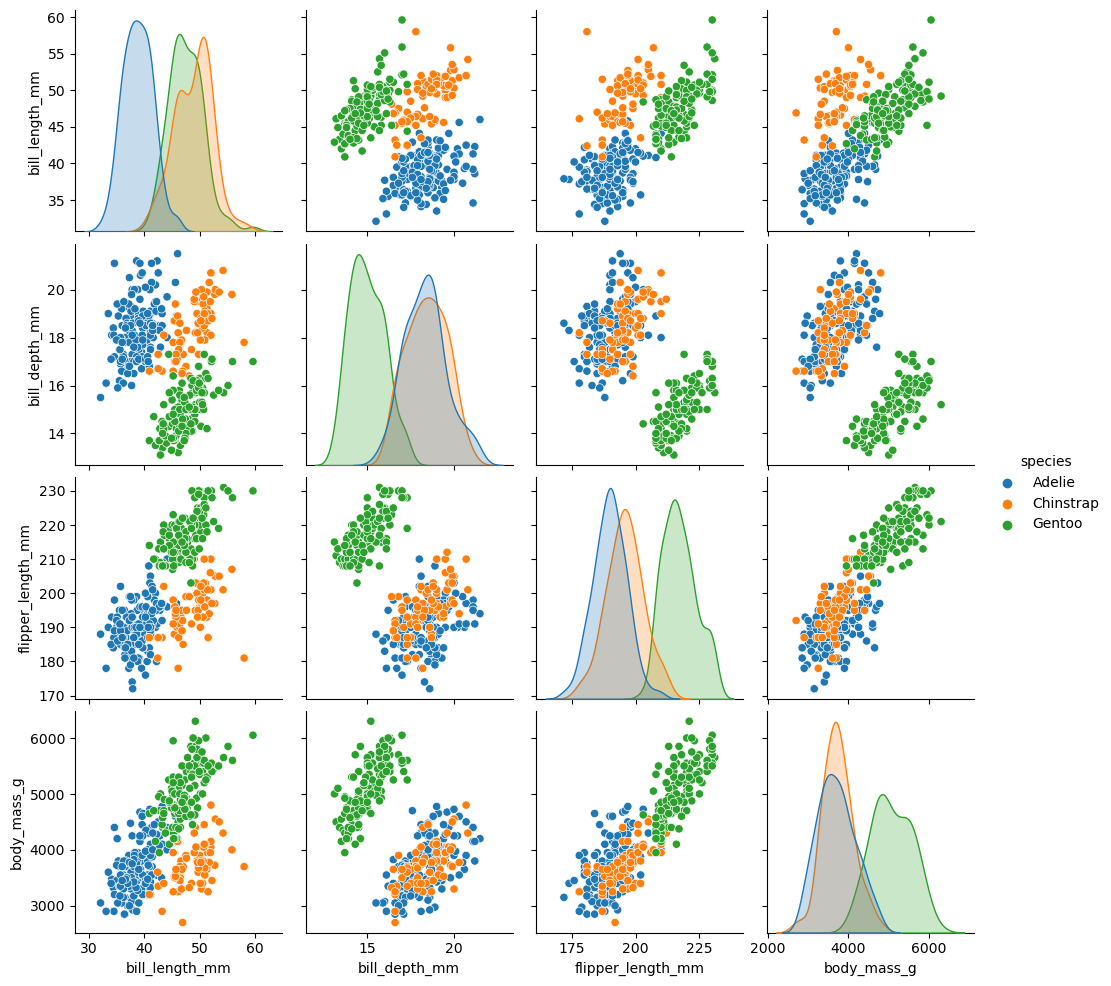

In [20]:
sns.pairplot(data = penguins, hue='species', 
             diag_kws={'common_norm': False})

plt.show()

The pairs plot works best when you have less than 10 variables.

You can get away with up to 15 to 20...but anything more than 20 is INFORMATION OVERLOAD!!!!!!

Because 20 variables...produces a PAIRS PLOT with a 20 X 20 plot matrix!!!!!!!

In [21]:
20 ** 2

400